## boston 집 값 예측

### [1] 모듈 로딩 및 데이터 준비

In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optimizer

import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(7)

In [3]:
DATA_FILE = '../DATA/boston.csv'

boston_df = pd.read_csv(DATA_FILE)
boston_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [4]:
len(boston_df.columns)

14

### [2] 모듈 준비

In [5]:
model = nn.Linear(13,1)

In [6]:
for name, param in model.named_parameters():
    print(f'[{name}] {param}\n')

[weight] Parameter containing:
tensor([[ 0.0194, -0.1671,  0.0883,  0.0870, -0.1482, -0.0416, -0.1625,  0.0720,
         -0.0747,  0.1948,  0.1969,  0.0283, -0.1182]], requires_grad=True)

[bias] Parameter containing:
tensor([-0.1629], requires_grad=True)



### [3] 최적화 인스턴스 준비

In [7]:
adam_optim = optimizer.Adam(model.parameters(), lr = 0.05)

### [4] 학습 

In [8]:
feature_ts = torch.from_numpy(boston_df[boston_df.columns[:-1]].values).float()
feature_ts.shape

torch.Size([506, 13])

In [9]:
target_ts = torch.from_numpy(boston_df[['MEDV']].values).float()
target_ts.shape

torch.Size([506, 1])

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_ts, target_ts, test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

print(f'[Feature] Train {x_train.shape}, Test {x_test.shape}, Val {x_val.shape}')
print(f'[Target] Train {y_train.shape}, Test {y_test.shape}, Val {y_val.shape}')


[Feature] Train torch.Size([323, 13]), Test torch.Size([102, 13]), Val torch.Size([81, 13])
[Target] Train torch.Size([323, 1]), Test torch.Size([102, 1]), Val torch.Size([81, 1])


학습

In [11]:
EPOCH = 20

In [12]:
def testing(test_ts, target_ts, kind='Val'):

    with torch.no_grad(): # 업데이트 안 함 
        pre_y = model(test_ts)
        
        loss = f.mse_loss(pre_y, target_ts)

        print(f'[{kind}] LOSS : {loss}')

    return loss 

In [56]:
def training(feature_ts, target_ts, val_ts, val_target_ts):
    
    loss_history = [[],[]]
    
    for epoch in range(EPOCH):
        pre_y = model(feature_ts) 

        loss = f.mse_loss(pre_y, target_ts)
        loss_history[0].append(loss.item())

        adam_optim.zero_grad()
        loss.backward()
        adam_optim.step()

        val_loss = testing(val_ts , val_target_ts)
        loss_history[1].append(val_loss.item())

        print(f'[{epoch}/{EPOCH}] LOSS : {loss}')

    return loss_history

In [57]:
loss = training(x_train, y_train, x_val, y_val)

[Val] LOSS : 811.6783447265625
[0/20] LOSS : 4522.1708984375
[Val] LOSS : 1217.749267578125
[1/20] LOSS : 943.9012451171875
[Val] LOSS : 2233.044677734375
[2/20] LOSS : 1202.645263671875
[Val] LOSS : 2037.9947509765625
[3/20] LOSS : 2182.93115234375
[Val] LOSS : 1168.702392578125
[4/20] LOSS : 1978.99365234375
[Val] LOSS : 449.5827941894531
[5/20] LOSS : 1116.67919921875
[Val] LOSS : 279.18878173828125
[6/20] LOSS : 433.0201721191406
[Val] LOSS : 525.4654541015625
[7/20] LOSS : 324.6600341796875
[Val] LOSS : 764.60205078125
[8/20] LOSS : 634.9303588867188
[Val] LOSS : 724.9454956054688
[9/20] LOSS : 908.1983642578125
[Val] LOSS : 462.45635986328125
[10/20] LOSS : 858.66650390625
[Val] LOSS : 204.3577117919922
[11/20] LOSS : 551.247802734375
[Val] LOSS : 136.1505584716797
[12/20] LOSS : 233.38037109375
[Val] LOSS : 275.70428466796875
[13/20] LOSS : 109.83139038085938
[Val] LOSS : 480.72979736328125
[14/20] LOSS : 209.694580078125
[Val] LOSS : 580.3902587890625
[15/20] LOSS : 392.3807067

In [62]:
loss

[[4522.1708984375,
  943.9012451171875,
  1202.645263671875,
  2182.93115234375,
  1978.99365234375,
  1116.67919921875,
  433.0201721191406,
  324.6600341796875,
  634.9303588867188,
  908.1983642578125,
  858.66650390625,
  551.247802734375,
  233.38037109375,
  109.83139038085938,
  209.694580078125,
  392.3807067871094,
  483.2519836425781,
  417.0580139160156,
  263.1504211425781,
  144.08717346191406],
 [811.6783447265625,
  1217.749267578125,
  2233.044677734375,
  2037.9947509765625,
  1168.702392578125,
  449.5827941894531,
  279.18878173828125,
  525.4654541015625,
  764.60205078125,
  724.9454956054688,
  462.45635986328125,
  204.3577117919922,
  136.1505584716797,
  275.70428466796875,
  480.72979736328125,
  580.3902587890625,
  512.9419555664062,
  348.6890869140625,
  210.65354919433594,
  177.61264038085938]]

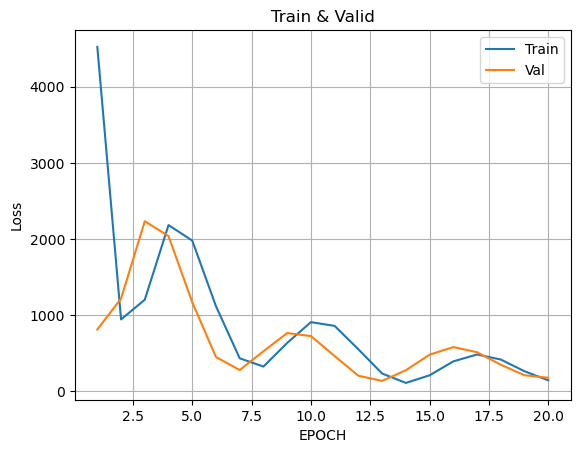

In [58]:
plt.plot(range(1,EPOCH+1), loss[0], label='Train')
plt.plot(range(1,EPOCH+1), loss[1], label = 'Val')
plt.title('Train & Valid')
plt.xlabel('EPOCH')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()


In [13]:
def training_dict(feature_ts, target_ts, val_ts, val_target_ts):
    
    loss_history = {}

    for epoch in range(EPOCH):
        pre_y = model(feature_ts) 

        loss = f.mse_loss(pre_y, target_ts)

        adam_optim.zero_grad()
        loss.backward()
        adam_optim.step()

        val_loss = testing(val_ts , val_target_ts)

        loss_history[loss.item()] = val_loss.item()

        print(f'[{epoch}/{EPOCH}] LOSS : {loss}')

    return loss_history

In [14]:
loss_dict = training_dict(x_train, y_train, x_val, y_val)

[Val] LOSS : 935.6109008789062
[0/20] LOSS : 4401.6025390625
[Val] LOSS : 981.8900756835938
[1/20] LOSS : 935.5006103515625
[Val] LOSS : 1851.194091796875
[2/20] LOSS : 1219.636474609375
[Val] LOSS : 1662.3271484375
[3/20] LOSS : 2147.55859375
[Val] LOSS : 890.4605712890625
[4/20] LOSS : 1912.47216796875
[Val] LOSS : 316.4018859863281
[5/20] LOSS : 1062.35986328125
[Val] LOSS : 291.2991027832031
[6/20] LOSS : 412.10076904296875
[Val] LOSS : 630.2232055664062
[7/20] LOSS : 330.8833923339844
[Val] LOSS : 884.0914306640625
[8/20] LOSS : 643.0521240234375
[Val] LOSS : 801.9219360351562
[9/20] LOSS : 897.4276123046875
[Val] LOSS : 479.1028747558594
[10/20] LOSS : 830.8859252929688
[Val] LOSS : 172.53749084472656
[11/20] LOSS : 524.8710327148438
[Val] LOSS : 77.74298095703125
[12/20] LOSS : 226.69061279296875
[Val] LOSS : 205.0742645263672
[13/20] LOSS : 128.45257568359375
[Val] LOSS : 399.2585144042969
[14/20] LOSS : 243.19879150390625
[Val] LOSS : 485.3399963378906
[15/20] LOSS : 422.63882

In [15]:
loss_dict

{4401.6025390625: 935.6109008789062,
 935.5006103515625: 981.8900756835938,
 1219.636474609375: 1851.194091796875,
 2147.55859375: 1662.3271484375,
 1912.47216796875: 890.4605712890625,
 1062.35986328125: 316.4018859863281,
 412.10076904296875: 291.2991027832031,
 330.8833923339844: 630.2232055664062,
 643.0521240234375: 884.0914306640625,
 897.4276123046875: 801.9219360351562,
 830.8859252929688: 479.1028747558594,
 524.8710327148438: 172.53749084472656,
 226.69061279296875: 77.74298095703125,
 128.45257568359375: 205.0742645263672,
 243.19879150390625: 399.2585144042969,
 422.6388244628906: 485.3399963378906,
 499.2730407714844: 408.3921813964844,
 422.4296569824219: 246.92872619628906,
 270.5308532714844: 124.74966430664062,
 163.93487548828125: 112.16608428955078}

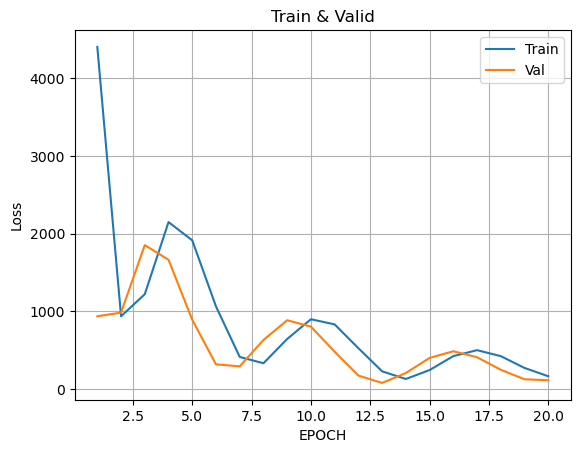

In [16]:
plt.plot(range(1,EPOCH+1), loss_dict.keys(), label='Train')
plt.plot(range(1,EPOCH+1), loss_dict.values(), label = 'Val')
plt.title('Train & Valid')
plt.xlabel('EPOCH')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()
